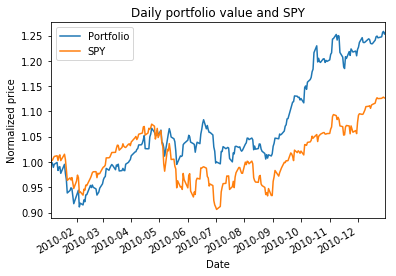

Start Date: 2010-01-01 00:00:00
End Date: 2010-12-31 00:00:00
Symbols: ['GOOG', 'AAPL', 'GLD', 'XOM']
Allocations: [0.2, 0.3, 0.4, 0.1]
Sharpe Ratio: 1.51819243641
Volatility (stdev of daily returns): 0.0100104028
Average Daily Return: 0.000957366234238
Cumulative Return: 0.255646784534
End Value: 1255646.78453


In [32]:
"""Analyze a portfolio.

Copyright 2017, Georgia Tech Research Corporation
Atlanta, Georgia 30332-0415
All Rights Reserved
"""

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from util import get_data, plot_data

# This is the function that will be tested by the autograder
# The student must update this code to properly implement the functionality
def assess_portfolio(sd = dt.datetime(2008,1,1), ed = dt.datetime(2009,1,1), \
    syms = ['GOOG','AAPL','GLD','XOM'], \
    allocs=[0.1,0.2,0.3,0.4], \
    sv=1000000, rfr=0.0, sf=252.0, \
    gen_plot=False):

    # Read in adjusted closing prices for given symbols, date range
    dates = pd.date_range(sd, ed)
    prices_all = get_data(syms, dates)  # automatically adds SPY
    prices = prices_all[syms]  # only portfolio symbols
    prices_SPY = prices_all['SPY']  # only SPY, for comparison later

    normed = prices/prices.iloc[0]
    alloced = normed * allocs
    pos_val = alloced * sv
    port_val = pos_val.sum(axis=1)
    
    cum_ret = port_val[-1]/port_val[0] - 1
    daily_returns = (port_val[1:] / port_val[:-1].values) - 1
    
    avg_daily_ret = daily_returns.mean()
    std_daily_ret = daily_returns.std()
    sharpe_rat = np.sqrt(sf) * np.mean(daily_returns - rfr) / std_daily_ret
    # Get portfolio statistics (note: std_daily_ret = volatility)
    cr, adr, sddr, sr = [cum_ret, avg_daily_ret, std_daily_ret, sharpe_rat] # add code here to compute stats

    # Compare daily portfolio value with SPY using a normalized plot
    if gen_plot:
        # add code to plot here
        df_temp = pd.concat([port_val/port_val[0], prices_SPY/prices_SPY[0]], keys=['Portfolio', 'SPY'], axis=1)
        plot = df_temp.plot(title="Daily portfolio value and SPY")
        plot.set_ylabel("Normalized price")
        plot.set_xlabel("Date")
        plt.savefig('plot.png')
        plt.show()
        

    # Add code here to properly compute end value
    ev = port_val[-1]
    
    return cr, adr, sddr, sr, ev

def test_code():
    # This code WILL NOT be tested by the auto grader
    # It is only here to help you set up and test your code

    # Define input parameters
    # Note that ALL of these values will be set to different values by
    # the autograder!
    start_date = dt.datetime(2010,1,1)
    end_date = dt.datetime(2010,12,31)
    symbols = ['GOOG', 'AAPL', 'GLD', 'XOM']
    allocations = [0.2, 0.3, 0.4, 0.1]
    start_val = 1000000  
    risk_free_rate = 0.0
    sample_freq = 252

    # Assess the portfolio
    cr, adr, sddr, sr, ev = assess_portfolio(sd = start_date, ed = end_date,\
        syms = symbols, \
        allocs = allocations,\
        sv = start_val, \
        gen_plot = True)

    # Print statistics
    print "Start Date:", start_date
    print "End Date:", end_date
    print "Symbols:", symbols
    print "Allocations:", allocations
    print "Sharpe Ratio:", sr
    print "Volatility (stdev of daily returns):", sddr
    print "Average Daily Return:", adr
    print "Cumulative Return:", cr
    print "End Value:", ev

if __name__ == "__main__":
    test_code()
